## Health insurance is vital for providing financial security against the high costs of medical care, enabling individuals to access necessary healthcare services and avoid overwhelming financial strain. However, accurately predicting healthcare claim amounts is critical for insurance companies to ensure financial sustainability, offer competitive premiums, and maintain efficient resource allocation.

The challenge lies in identifying the factors that significantly contribute to healthcare costs and tailoring predictive models to account for regional variations in healthcare expenses. These variations can arise due to differences in demographics, healthcare infrastructure, and lifestyle factors across regions.

This project aims to analyze data from a health insurance company comprising 1,338 policyholders described by attributes such as age, gender, BMI, smoking status, and region. The primary goal is to develop machine learning models to predict the total claim amount ("charges") billed to the insurance company. By creating separate predictive models for each of the four regions (Southwest, Southeast, Northwest, and Northeast), the project seeks to:

Improve the accuracy of claim amount predictions by accounting for regional differences in healthcare costs.
Identify key factors contributing to higher claim amounts, such as smoking status, BMI, or age, to enable data-driven decision-making.
Support strategic planning for premium pricing and resource allocation, ensuring equitable and efficient service delivery across all regions

 ## Problem Statement ( Key-Point-wise)

### Importance of Health Insurance:
Provides financial security against high medical costs.

Ensures access to necessary healthcare services.

Reduces financial strain for individuals.

### Challenges for Insurance Companies:
Accurately predicting healthcare claim amounts to maintain financial stability.

Understanding factors contributing to healthcare costs.

Accounting for regional differences in healthcare expenses.

### Dataset Overview:
Contains data for 1,338 policyholders.

Attributes include age, gender, BMI, smoking status, and region.

Regions are Southwest, Southeast, Northwest, and Northeast.

### Primary Objectives:
Predict the total claim amount ("charges") billed to the insurance company.

Develop region-specific models to account for regional variations in healthcare costs.

### Goals of the Project:
Improve Prediction Accuracy: Tailor models to each region for better accuracy.

Identify Key Factors: Analyze attributes like BMI, smoking status, and age to determine their impact on claim amounts.

Strategic Planning: Support premium pricing, risk management, and resource allocation.

### Expected Outcomes:
Enhanced forecasting of insurance claims.

Insights into cost-driving factors.

Better-informed decisions for equitable and efficient health insurance services.

# Data Collection & Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\chira\Downloads\insurance.csv")
data = df

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


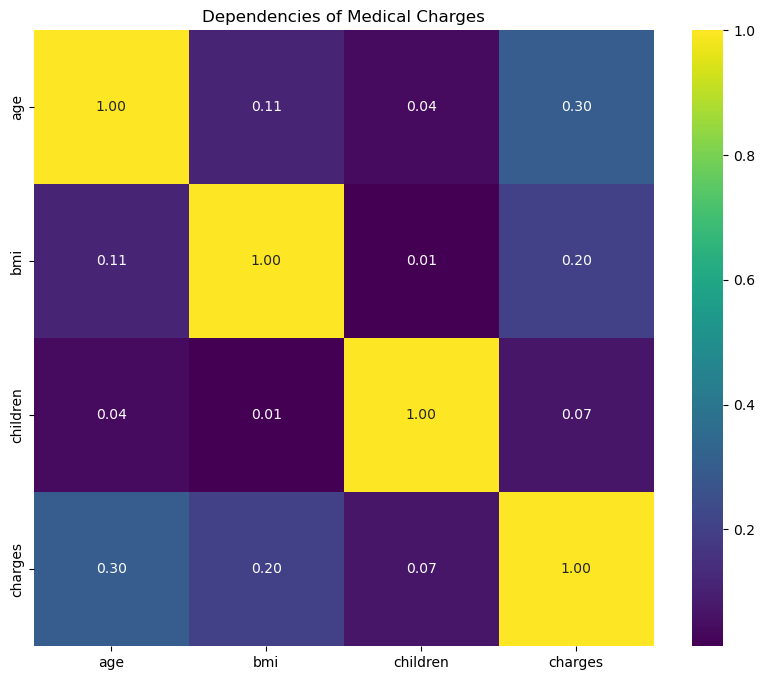

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='viridis',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [11]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [12]:
df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
cat=df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


# 

👉Sex:

Number of Policyholders: There are 676 male policyholders and 662 female policyholders.
Average Claim Amount: On average, male policyholders have a claim amount of $13,956.75, whereas female policyholders have a lower average claim amount of \$12,569.58.

👉Smoker:

Number of Policyholders: There are 1,064 non-smokers and 274 smokers.
Average Claim Amount: Smokers have a significantly higher average claim amount of $32,050.23 compared to non-smokers, who have an average claim amount of \$8,434.27.

👉Region:

Number of Policyholders: The number of policyholders is fairly evenly distributed across regions with 364 in the Southeast, 325 in the Northwest, 325 in the Southwest, and 324 in the Northeast.
Average Claim Amount: The average claim amount varies by region, with the Southeast having the highest average at $14,735.41 and the Southwest the lowest at 12

12,417.58, respectively.

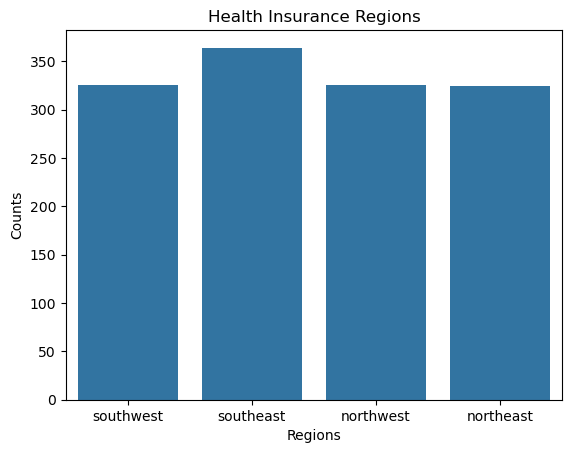

In [14]:

# Let's count the regions
southwest = len(df[df['region'] == 'southwest'])
southeast = len(df[df['region'] == 'southeast'])
northwest = len(df[df['region'] == 'northwest'])
northeast = len(df[df['region'] == 'northeast'])

# Create a bar chart
sns.barplot(x=['southwest', 'southeast', 'northwest', 'northeast'], y=[southwest, southeast, northwest, northeast])

#To add labels and title
plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Health Insurance Regions")
plt.show()

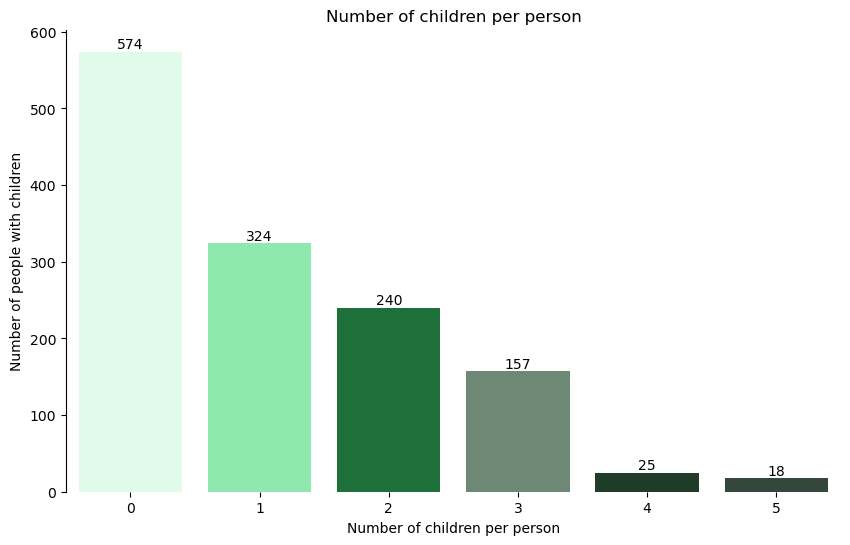

In [15]:
color_scheme = ['#dbffe7','#80f7a8','#107d34', '#688e74','#194126','#314a39']
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['children'], palette =color_scheme)
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Number of people with children')

for i in ax.containers:
    ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

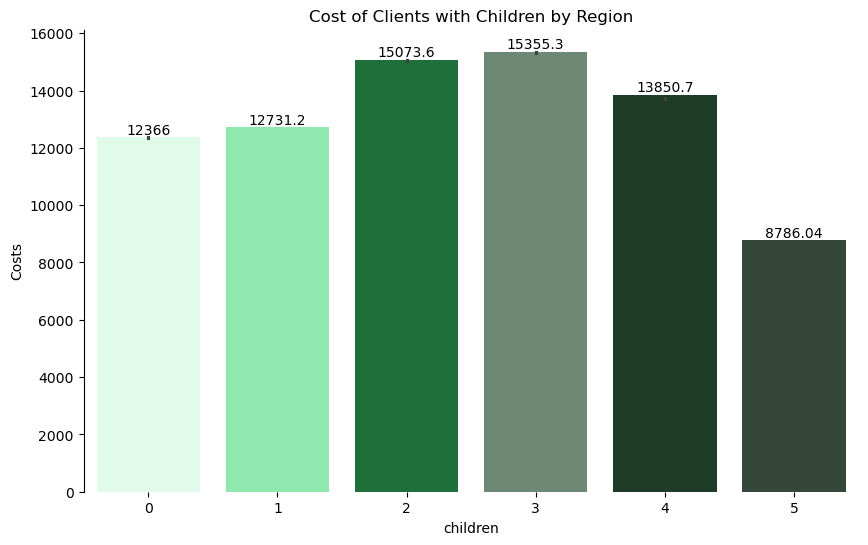

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'region' is the column with region names and 'count' is the count of people
sns.barplot(x = df['children'], y = df['charges'], ci= 1, palette=color_scheme)
plt.ylabel('Costs')
plt.title('Cost of Clients with Children by Region')

# Labeling the bars with their respective counts
for container in ax.containers:
    ax.bar_label(container)

# Removing unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Usually, we want to keep the bottom spine visible for the x-axis.
ax.spines['right'].set_visible(False)

plt.show()

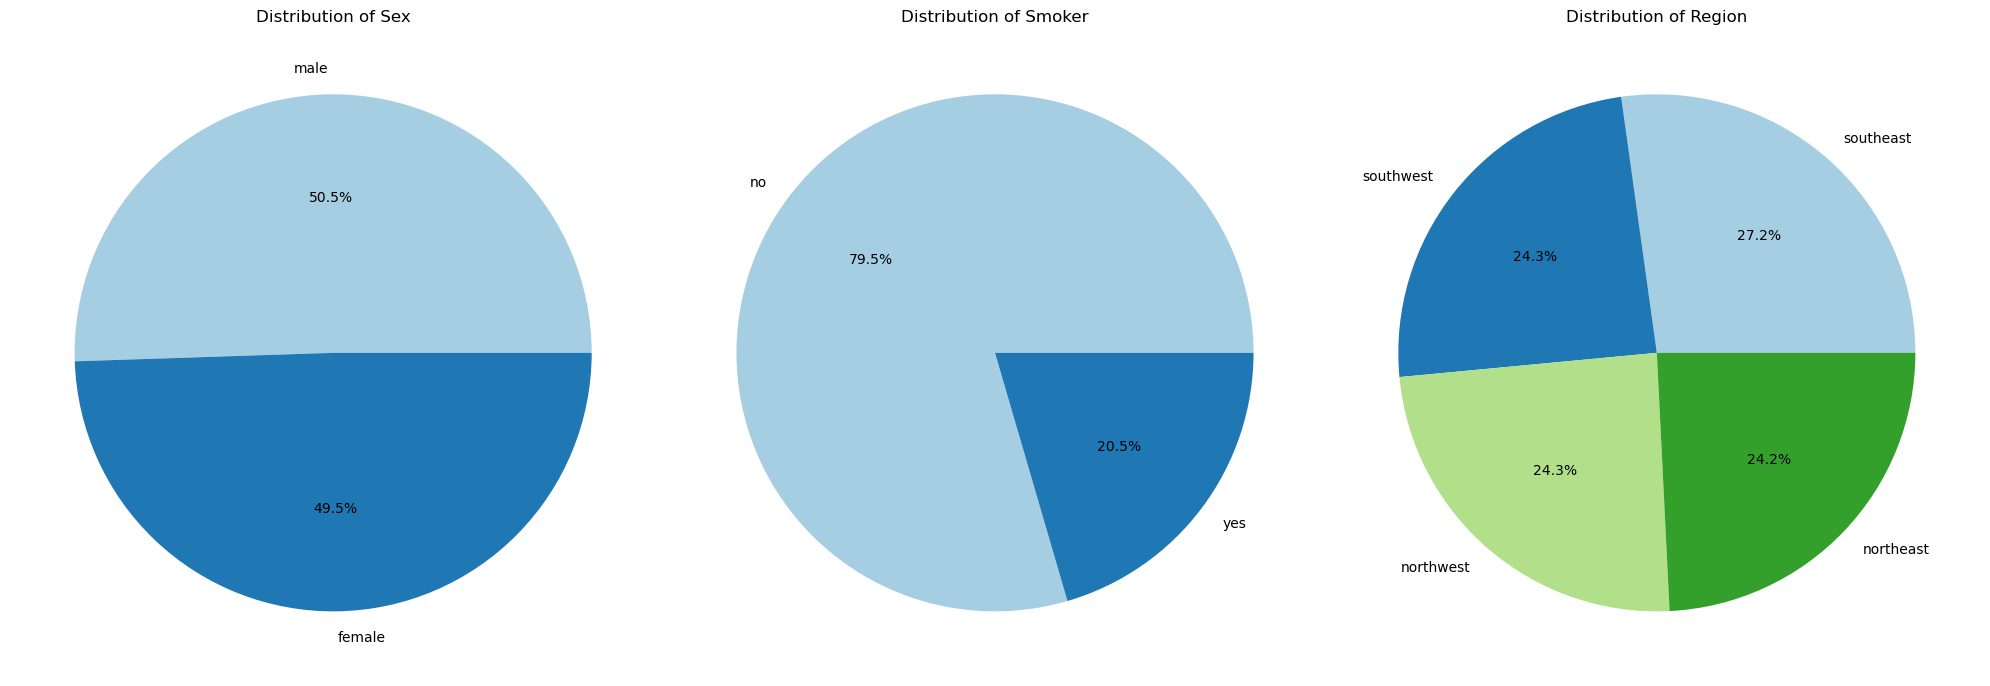

In [17]:
# Features to plot
features = ['sex', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i]
    x = df[col].value_counts()
    ax.pie(x.values, labels=x.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(x))))
    ax.set_title(f'Distribution of {col.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

# 
👉 The boxplots demonstrate how insurance costs are favorably biased for each location, with a few significant outliers. The Southeast area, which has the largest claim in the data set at nearly $63,000 and the lowest claim at \$1,121, has more inconsistent insurance costs. The Northeast area has the greatest total median cost, although the median claim amounts probably don't differ that much because the boxplots' notches overlap.

In [18]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=df.copy()
fig = px.box(plot_df, x="region", y="charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Insurance Costs by Region",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=9, opacity=0.5, line=dict(width=1,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Region', yaxis_title='Claim Amount, $',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

In [20]:
fig=px.histogram(df, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#6ead4c','#b1f08e']) 
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

#
👉 Compared to smokers, whose typical claim amount is over $ 34,000, non-smokers' median claim amount is around $7,300. There is also a noticeable difference in the way the groups divide the expenses of insurance. The distribution is tilted to the right for non-smokers, while the claim amounts for smokers are more variable, showing a bimodal distribution with peaks close to $20,000 and $40,000 and a broader spread in the boxplot.

In [24]:
plot_df = df.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in df['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#107d34','#80f7a8'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

# What is the relationship between age, smoker and the bmi?
👉 Insurance costs for smokers are, on average, far greater than those for non-smokers in every age category. Age-related increases in claim amounts are also evident, with the 60 and older age group having the most costly claims.

In [25]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

#
👉 Claim amounts exhibit a positive correlation with body mass index (BMI) as well as age,
meaning that higher BMI and older age are associated with higher claim costs. 
This relationship suggests that individuals with greater body mass and advancing age may experience more health-related issues,
leading to increased insurance claims. Additionally, smokers show a heightened sensitivity to this trend, 
as their insurance costs increase more significantly with BMI compared to non-smokers.

# Do smokers have a higher insurance fee than does who do not?

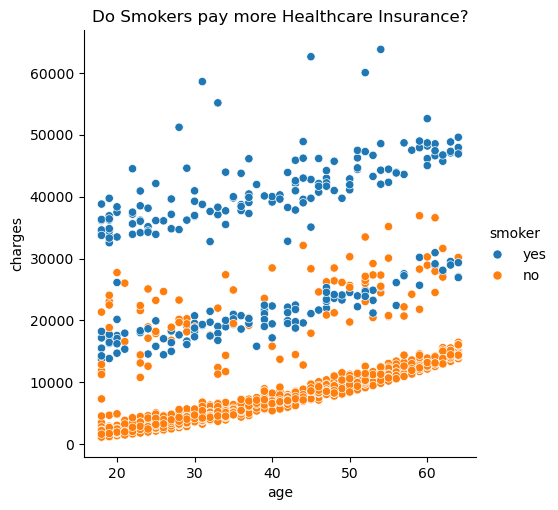

In [26]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Do Smokers pay more Healthcare Insurance?")
plt.show()

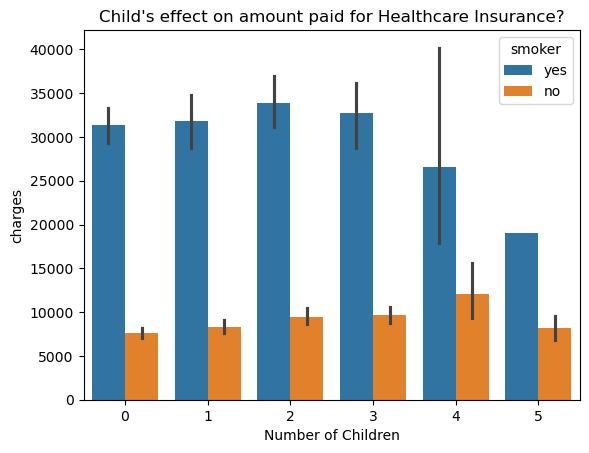

In [27]:
#To do this, let's plot a barplot
sns.barplot(x='children', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("charges")
plt.title("Child's effect on amount paid for Healthcare Insurance?")
plt.show()

In [28]:
# Group by region, sex, and smoker, then calculate mean charges
plot_df = df.groupby(['region', 'sex', 'smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index()

# Create bar plot
fig = px.bar(
    plot_df,
    x='region',
    y='charges',
    color='sex',
    height=800,
    title="Average Insurance Costs by Region and Smoking Status",
    color_discrete_map={'female': '#107d34', 'male': '#80f7a8'},  # Updated colors
    facet_row='smoker',
    text='charges',
    opacity=0.85,
    barmode='group'
)

# Update traces
fig.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    marker_line=dict(width=1, color='#303030')
)

# Update layout
fig.update_layout(
    yaxis2=dict(matches=None),
    font_color="#303030",
    paper_bgcolor="white",
    plot_bgcolor="white",
    bargroupgap=0.05,
    bargap=0.2,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title=""
    )
)

# Update axes
fig.update_xaxes(
    title="Region",
    row=1
)
fig.update_yaxes(
    title="Claim Amount, $",
    gridcolor='#E3E3E3',
    zeroline=True,
    zerolinewidth=2,
    showgrid=False,
    zerolinecolor='#E5E5EA',
    showline=True,
    linecolor='#E5E5EA',
    linewidth=2
)

# Format facet annotations
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show plot
fig.show()

#
👉 Non-smokers generally incur smaller insurance claims compared to smokers, with average claim amounts being just under $10,000 across all regions. This suggests that non-smokers tend to experience fewer or less severe health issues that require insurance claims. In contrast, smokers have significantly higher average claims, which vary widely from approximately $28,000 to over $36,000, indicating that smoking is associated with more frequent or severe health problems that lead to higher insurance costs.

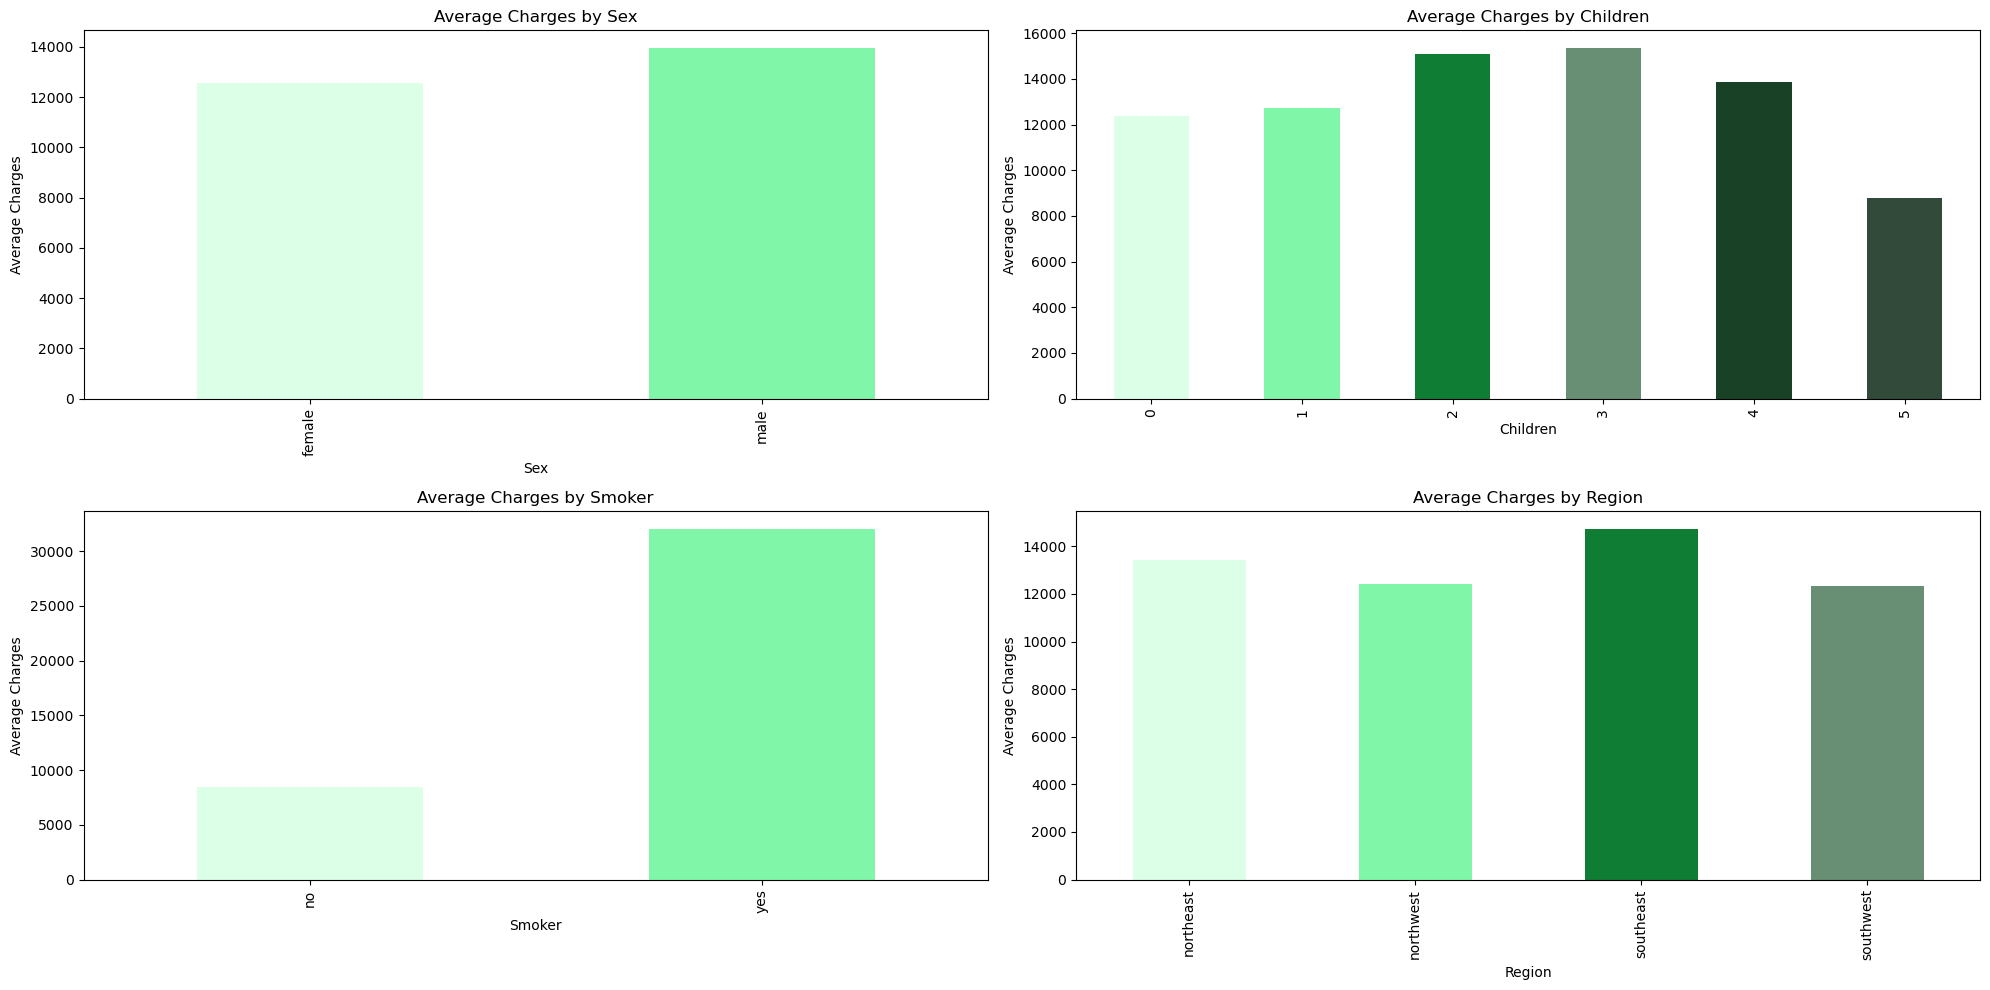

In [29]:
# Define color scheme
color_scheme = ['#dbffe7','#80f7a8','#107d34', '#688e74','#194126','#314a39']

# Features to plot
features = ['sex', 'children', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    
    # Group by the column and calculate the mean charges
    df_grouped = df.groupby(col).mean()['charges']
    
    # Plot the grouped data with the custom color scheme
    df_grouped.plot.bar(ax=ax, color=color_scheme)
    ax.set_title(f'Average Charges by {col.capitalize()}')
    ax.set_ylabel('Average Charges')
    ax.set_xlabel(col.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

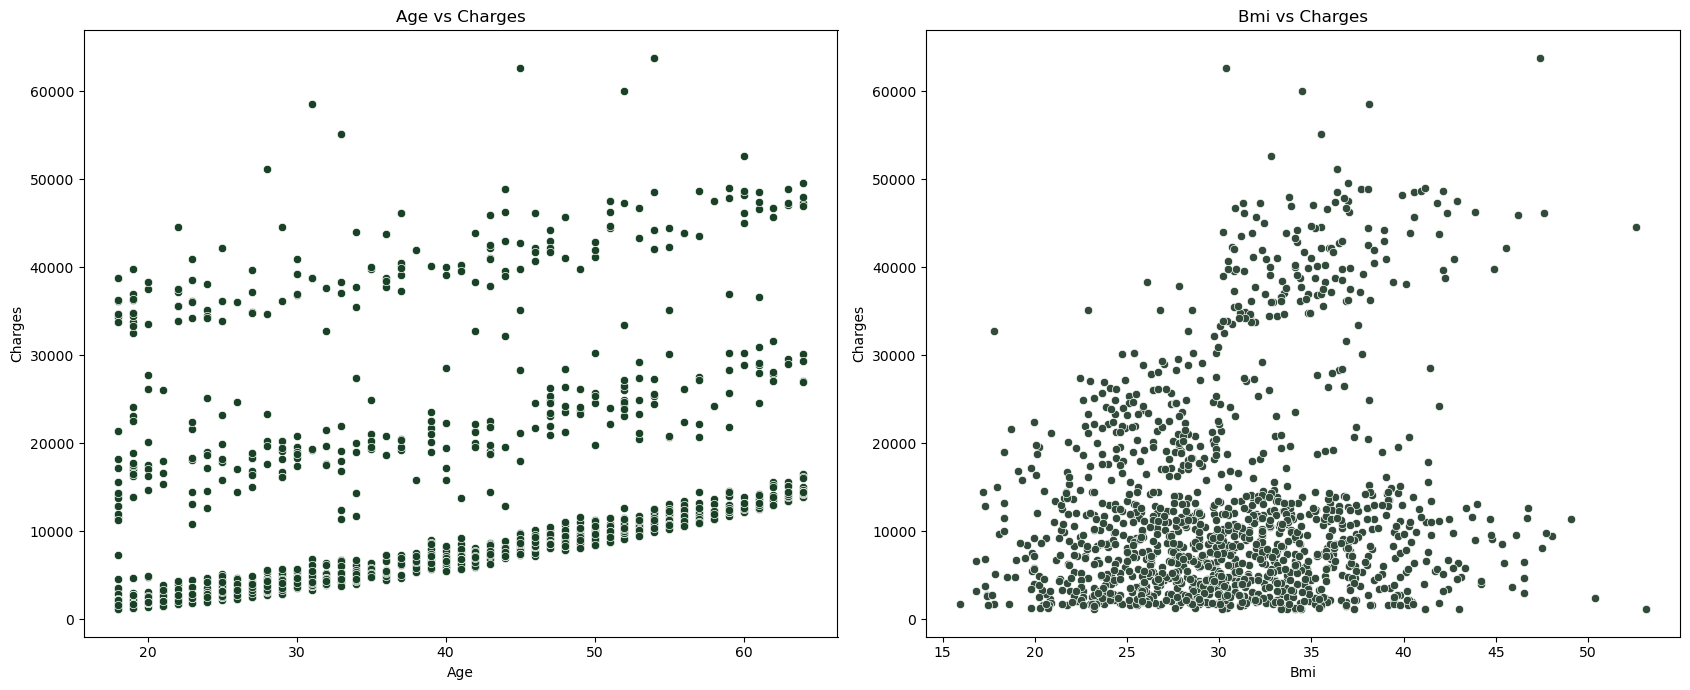

In [30]:
# Features to plot
features = ['age', 'bmi']
color_scheme = ['#194126','#314a39']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Plot each feature with specified colors
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='charges', color=color_scheme[i], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Charges')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#
Machine learning (ML) is revolutionizing the healthcare and insurance industries by enabling more accurate risk assessment, personalized services, and efficient operations. In the health insurance sector, ML models leverage vast amounts of data to predict outcomes, enhance decision-making, and improve customer experiences.
Machine learning is transforming the health insurance industry by enabling more accurate risk assessment, enhancing fraud detection, improving claims management, and personalizing customer interactions. As the technology continues to evolve, its applications in health insurance are expected to grow, driving further innovation and efficiency in the sector. Addressing challenges related to data privacy, bias, and interpretability will be crucial to realizing the full potential of ML in health insurance

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = df

# Step 2: Feature Engineering
## 2.1 BMI Category
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

## 2.2 Interaction Term - Smoker and BMI
data['smoker_bmi_interaction'] = data['bmi'] * data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

## 2.3 Age Grouping
bins_age = [0, 18, 35, 50, np.inf]
labels_age = ['Youth', 'Young Adult', 'Middle Aged', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins_age, labels=labels_age)

## 2.4 One-Hot Encoding for Categorical Features
categorical_features = ['sex', 'smoker', 'region', 'bmi_category', 'age_group']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

## 2.5 Standardizing Continuous Features (Optional, for later pipeline)
# Continuous features like 'age', 'bmi', 'children', 'smoker_bmi_interaction' can be standardized during model preprocessing.
# For now, we leave them untouched.

# Step 3: Display Transformed Data
print("Transformed Data:\n", data.head())


Transformed Data:
    age     bmi  children      charges  smoker_bmi_interaction  sex_male  \
0   19  27.900         0  16884.92400                    27.9         0   
1   18  33.770         1   1725.55230                     0.0         1   
2   28  33.000         3   4449.46200                     0.0         1   
3   33  22.705         0  21984.47061                     0.0         1   
4   32  28.880         0   3866.85520                     0.0         1   

   smoker_yes  region_northwest  region_southeast  region_southwest  \
0           1                 0                 0                 1   
1           0                 0                 1                 0   
2           0                 0                 1                 0   
3           0                 1                 0                 0   
4           0                 1                 0                 0   

   bmi_category_Normal weight  bmi_category_Overweight  bmi_category_Obese  \
0                        

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features and target
X = data.drop(columns=['charges'])  # Features
y = data['charges']                # Target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'smoker_bmi_interaction']
categorical_columns = [col for col in X.columns if col not in numerical_columns]

# Step 4: Create preprocessing pipelines
## Numerical data: Standard scaling
numerical_transformer = StandardScaler()

## Categorical data: Pass-through (already one-hot encoded)
categorical_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


In [34]:
# Step 5: Build a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 6: Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model_pipeline.predict(X_test)

In [35]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 20904121.11
R-squared (R2): 0.87


In [36]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Step 2: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R-squared as the scoring metric
    n_jobs=-1,     # Use all available processors
    verbose=2
)

# Step 3: Fit GridSearchCV
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Step 4: Display best parameters and best score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nOptimized Model Performance:")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"R-squared (R2): {r2_optimized:.2f}")


Starting Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best Cross-Validation Score: 0.838794974394397

Optimized Model Performance:
Mean Squared Error (MSE): 19341092.28
R-squared (R2): 0.88



Feature Importances:
                       Feature  Importance
3       smoker_bmi_interaction    0.827117
0                          age    0.120965
1                          bmi    0.023279
2                     children    0.011753
5                   smoker_yes    0.004795
4                     sex_male    0.002364
7             region_southeast    0.002102
8             region_southwest    0.001948
6             region_northwest    0.001736
10     bmi_category_Overweight    0.001330
13       age_group_Middle Aged    0.001102
9   bmi_category_Normal weight    0.000435
14            age_group_Senior    0.000411
12       age_group_Young Adult    0.000392
11          bmi_category_Obese    0.000272


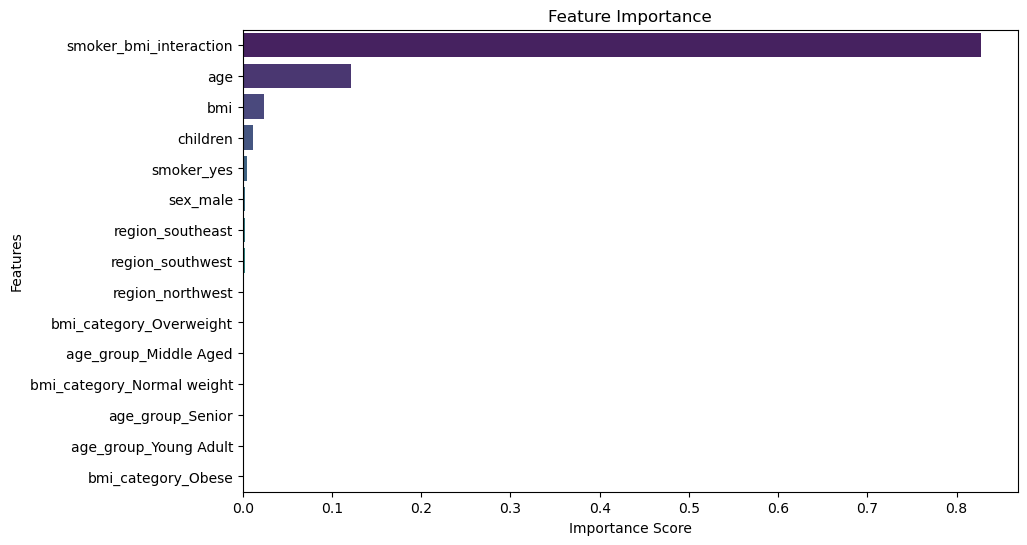

In [40]:
# Extract feature importances
feature_importances = best_model.named_steps['regressor'].feature_importances_
feature_names = numerical_columns + categorical_columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [44]:
import joblib

# Save the model
joblib.dump(best_model, 'optimized_insurance_model.pkl')
print("Optimized model saved as 'optimized_insurance_model.pkl'.")

# Load the model (if needed later)
loaded_model = joblib.load('optimized_insurance_model.pkl')


Optimized model saved as 'optimized_insurance_model.pkl'.
